# Ajuste de curvas (curve fitting)

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Análise de regressão

A análise de regressão é uma área muito importante das ciências em geral, que busca determinar a relação entre variáveis dependentes e independentes. Há muitos métodos de regressão, sendo a regressão linear um deles. 

Imagine que você deseja medir uma determinada grandeza física (temperatura, posição, velocidade, enfim... qualquer coisa!)  de algum objeto ao longo do tempo. O tempo é a variável independente, enquanto a grandeza medida é a variável dependente. Baseado nos dados medidos $(t_i,y_i)$, você deseja determinar uma função $y(t)$ que descreve bem estes dados, e utilizar a função $y(t)$ para prever o comportamento de outros sistemas similares.

### Regressão linear

Observe a curva abaixo e perceba que os dados parecem ser bem descritos por uma função linear $y = a t + b$. O objetivo da regressão linear é determinar os parâmetros $a$ e $b$ que melhor reproduzem os dados medidos.


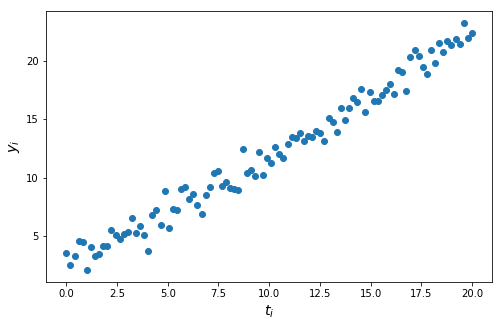

In [53]:
# -------------------------------------------------------------------
# example of linear regression
# -------------------------------------------------------------------

import numpy as np
from scipy import optimize

# Seed the random number generator for reproducibility
np.random.seed(0)

# linear function definition
def linear_func(x, a, b):
    return a*x+b

# filling vectors
t = np.linspace(0, 20,100)
y = linear_func(t, 1, 2) + 0.9*np.random.normal(size=len(t))

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(t, y)
plt.xlabel('$t_i$', size = 'x-large')
plt.ylabel('$y_i$', size = 'x-large')
plt.show()

In [54]:
# The data fitting is performed with the function curve_fit of the scypy.optimize object

params, params_covariance = optimize.curve_fit(linear_func, t, y, p0=[2, 10])
print(params)

[0.98662029 2.18762431]


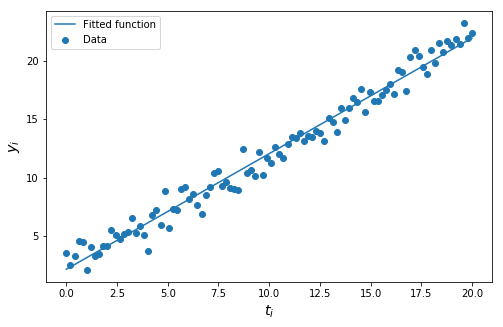

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(t, y, label='Data')
plt.plot(t, linear_func(t, params[0], params[1]),
         label='Fitted function')
plt.xlabel('$t_i$', size = 'x-large')
plt.ylabel('$y_i$', size = 'x-large')
plt.legend(loc='best')
plt.show()

### Regressão não-linear

Note que os dados parecem ser se encaixar em uma função $y = a \sin (b t)$.  O objetivo da regressão linear é determinar os parâmetros $a$ e $b$ que melhor reproduzem os dados medidos.

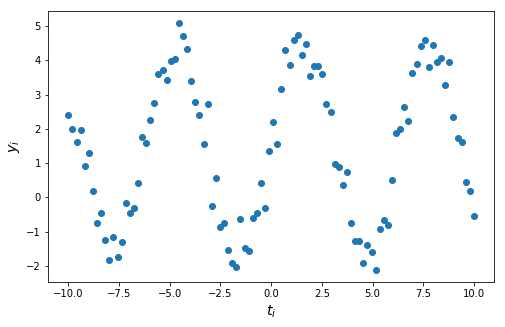

In [79]:
# linear function definition
def sin_func(x, a, b):
    return a*np.sin(x)+b

# filling vectors
t = np.linspace(-10, 10,100)
y = sin_func(t, 3, 1.5) + 0.5*np.random.normal(size=len(t))

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(t, y)
plt.xlabel('$t_i$', size = 'x-large')
plt.ylabel('$y_i$', size = 'x-large')
plt.show()

[2.99183496 1.43820036]


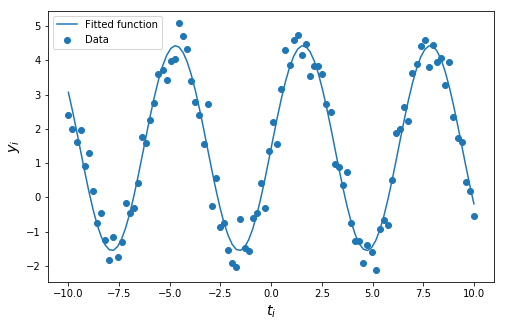

In [81]:
# The data fitting is performed with the function curve_fit of the scypy.optimize object

params, params_covariance = optimize.curve_fit(sin_func, t, y, p0=[10, 0])
print(params)

plt.figure(figsize=(8, 5))
plt.scatter(t, y, label='Data')
plt.plot(t, sin_func(t, params[0], params[1]),
         label='Fitted function')
plt.xlabel('$t_i$', size = 'x-large')
plt.ylabel('$y_i$', size = 'x-large')
plt.legend(loc='best')
plt.show()

### Formulação matemática do problema

Partindo-se de um número $m$ de pontos $(t_i,y_i)$, assume-se que os pontos medidos são bem descritos pela relação:

$$y_i = \Gamma(t_i) + e_i, $$

onde $\Gamma(t)$ é uma função sem ruído, e $e_i$ representa o erros nos dados, que podem ter origem erro na medida, bem como variações aleatórias nos processos físicos que geraram os dados. Desejamos determinar um modelo de fitting $M(\bar{p},t)$, onde$\bar{p} = [p_1,p_2,p_3,...,p_n]$ representa o conjunto de parâmetros que caracterizam o modelo (como os parâmetros $a$ e $b$ que descrevemos acima).

Na regressão linear (como no caso dos dados representados por uma função linear acima), assume-se a seguinte forma para $M(\bar{p},t)$:

$$M(\bar{p},t) = \sum_{j=1}^n p_j f_j(t)$$

onde as funções $f_j(t)$ são escolhidas de acordo com o modelo que melhor refletem os dados. No caso linear mostrado acima temos $n = 2$, $f_1(t) = t^0$ e $f_2(t) = t^1$.

A técnica padrão para determinar os parâmetros de ajuste é a técnica dos mínimos quadrados (least squares fit). Este método baseia-se na minimização dos resíduos:

$$r_i = y_i - M(\bar{p},t_i).$$

Note que cada resíduo é uma função dos $n$ parâmetros de $\bar{p}$. A minimização dos resíduos consiste em determinar os parâmetros $\bar{p}$ que minimizam a soma dos quadrados dos resíduos:

$$min \sum_{i}\left[ r_i(\bar{p})^2 \right] = min \left[ \sum_i(y_i - M(\bar{p},t_i))^2\right].$$

Note que:

$$r_i = y_i - M(\bar{p},t_i)$$
$$r_i = (y_i - \Gamma(t_i)) + (\Gamma(t_i) - M(\bar{p},t_i))$$
$$r_i = e_i + (\Gamma(t_i) - M(\bar{p},t_i))$$

A quantidade $e_i$ representa o erro devido a imprecisões na medida, e a quantidade $(\Gamma(t_i) - M(\bar{p},t_i))$ representa o erro de aproximação entre a função dos dados puros e o modelo de fitting. Um bom modelo de fitting é aquele no qual o erro de aproximação é do mesmo tamanho que a imprecisão da medida.  

